In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
data = pd.read_csv("ELISA.csv")

In [6]:
concentrations = ["80","40","20","10","5","2.5","1.25","0.63","0.31","0.16","0.078","0.039", "0"]

In [19]:
def growthPlot(name, title, letter, ctrl):
    savename = f'{name}.pdf'
    fig, ax = plt.subplots()
    
    i = 0
    for e in [(letter+'{}').format(i) for i in range(1,13)]+[ctrl]:
        name.plot(data["Time"], data[e],label=concentrations[i])
        i += 1

    ax.set_title(title)
    ax.set_xlabel("Tid [timer]")
    ax.set_ylabel("Absorbans")
    plt.subplots_adjust(right=0.77)
    ax.legend(loc=(1.04,0.1), title='Koncentration')
    plt.tight_layout(pad=0.25)
    plt.savefig(savename, dpi=150)
    
    plt.show()

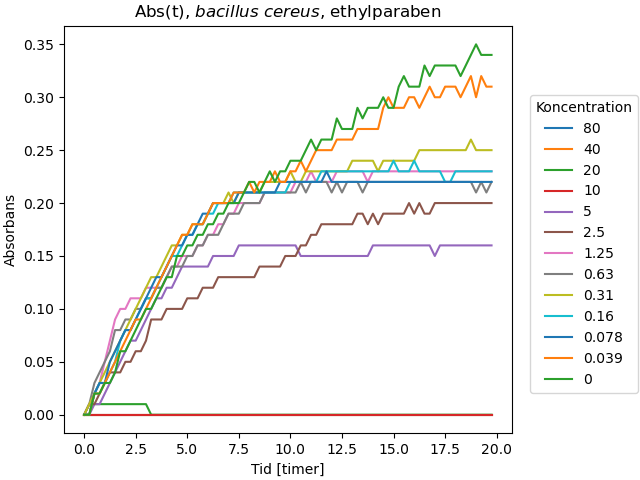

In [8]:
vækstbcethyl = growthPlot('vækstbcethyl' ,"Abs(t), $\it{bacillus~cereus}$, ethylparaben", 'B', 'A11')

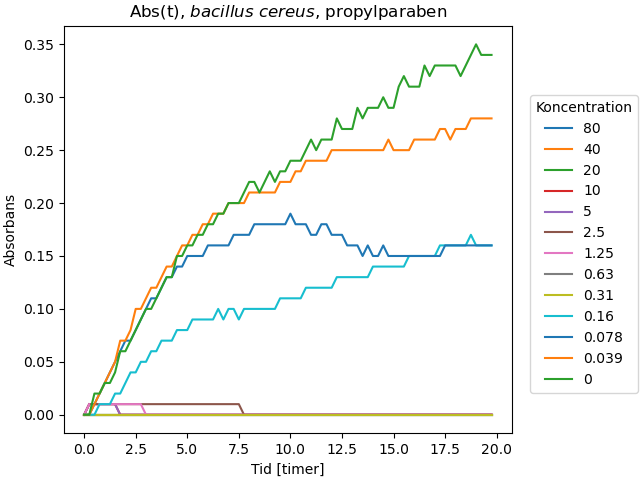

In [9]:
vækstbcpropyl = growthPlot('vækstbcpropyl' ,"Abs(t), $\it{bacillus~cereus}$, propylparaben", 'C', 'A11')

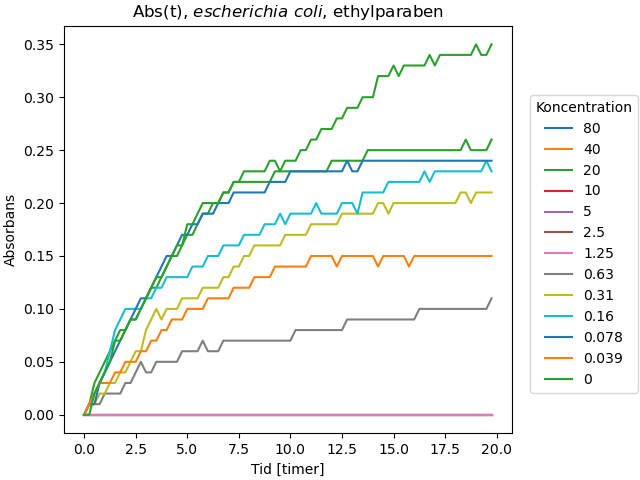

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Abs(t), $\\it{escherichia~coli}$, ethylparaben'}, xlabel='Tid [timer]', ylabel='Absorbans'>)

In [10]:
growthPlot('vækstecethyl' ,"Abs(t), $\it{escherichia~coli}$, ethylparaben", 'F', 'E10')

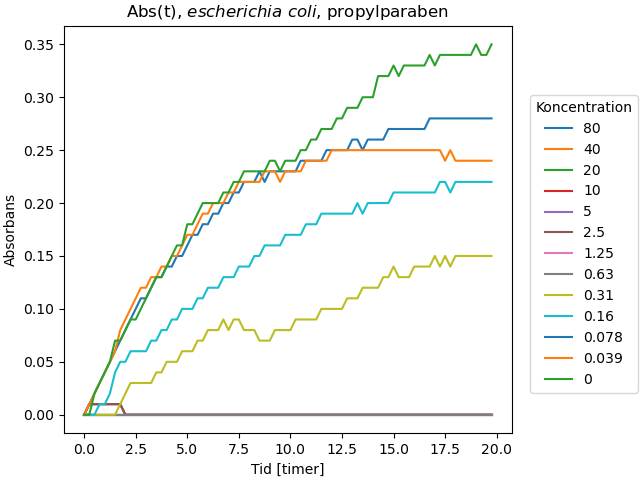

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Abs(t), $\\it{escherichia~coli}$, propylparaben'}, xlabel='Tid [timer]', ylabel='Absorbans'>)

In [11]:
growthPlot('vækstecpropyl' ,"Abs(t), $\it{escherichia~coli}$, propylparaben", 'G', 'E10')

In [20]:
def micPlot(name, title, letter, ctrl, remove_index = []):
    x = list(map(float, concentrations))
    savename = f'{name}.pdf'
    fig, ax = plt.subplots()

    y = data.loc[68,[(letter+'{}').format(i) for i in range(1,13)]+[ctrl]].values.tolist()
    if remove_index is not None:
        for e in remove_index:
            del x[e]
            del y[e]
        
    ax.plot(x, y)

    ax.set_title(title)
    ax.set_xlabel("log(c)")
    ax.set_ylabel("Absorbans(17t)")
    ax.set_xscale("log")
    plt.tight_layout(pad=0.25)
    plt.savefig(savename, dpi=150)
    plt.show()

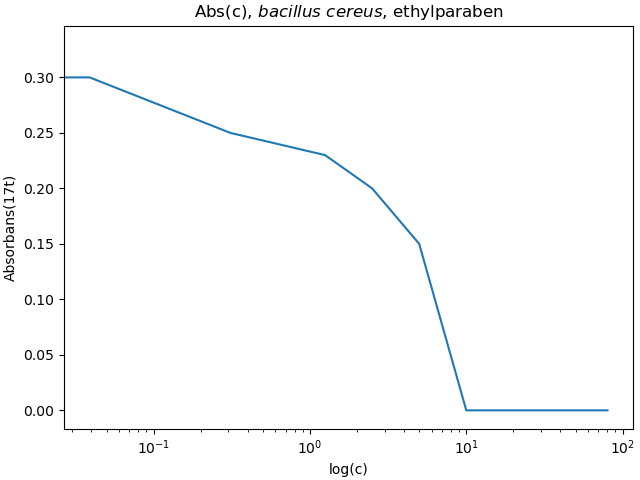

In [13]:
micPlot('micbcethyl', "Abs(c), $\it{bacillus~cereus}$, ethylparaben", 'B', 'A11', [10,9,7])

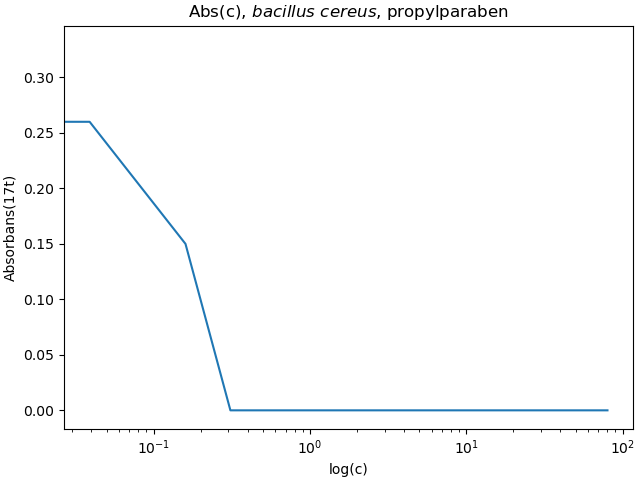

In [14]:
micPlot('micbcpropyl', "Abs(c), $\it{bacillus~cereus}$, propylparaben", 'C', 'A11', [10])

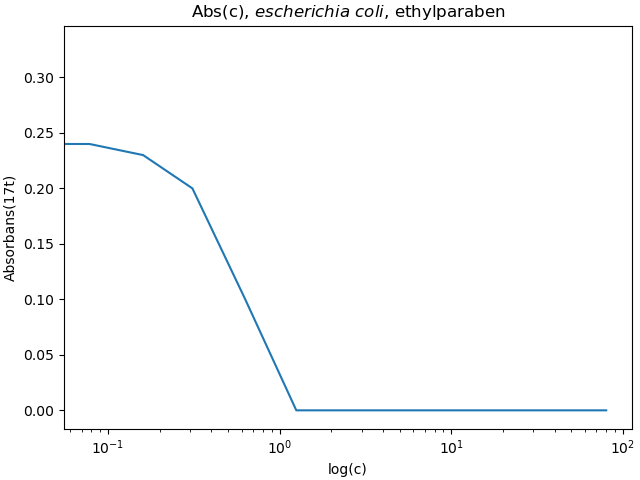

In [15]:
micPlot('micecethyl', "Abs(c), $\it{escherichia~coli}$, ethylparaben", 'F', 'E10', [11,2])

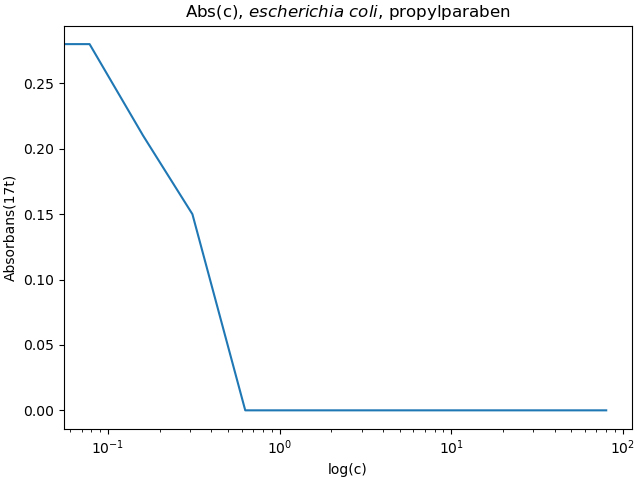

In [16]:
micPlot('micecpropyl', "Abs(c), $\it{escherichia~coli}$, propylparaben", 'G', 'E11', [11])

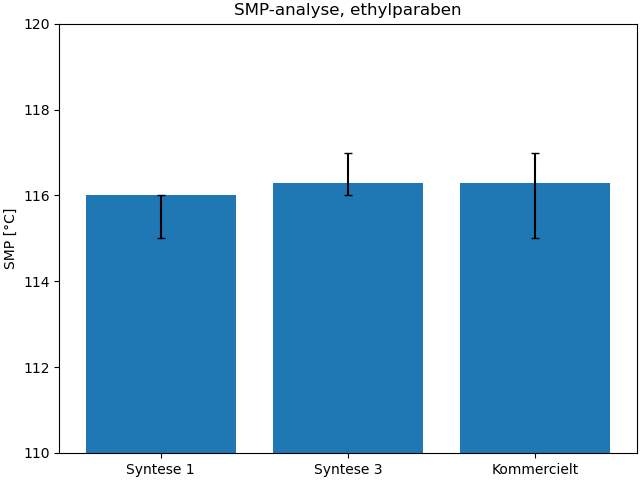

In [74]:
fig, ax = plt.subplots();

samples = ['Syntese 1', 'Syntese 3', 'Kommercielt'];
smp = [116, 116.3, 116.3];
smp_low = [1, .3, 1.3];
smp_high = [0, .7, .7];
smp_error = [smp_low, smp_high]

ax.set_ylim([110, 120])

ax.bar(samples, smp, yerr = smp_error, capsize=3);

ax.set_ylabel('SMP [°C]');
ax.set_title('SMP-analyse, ethylparaben');
plt.tight_layout(pad=0.25)
plt.savefig('ethylsmp.pdf', dpi=150)

plt.show()

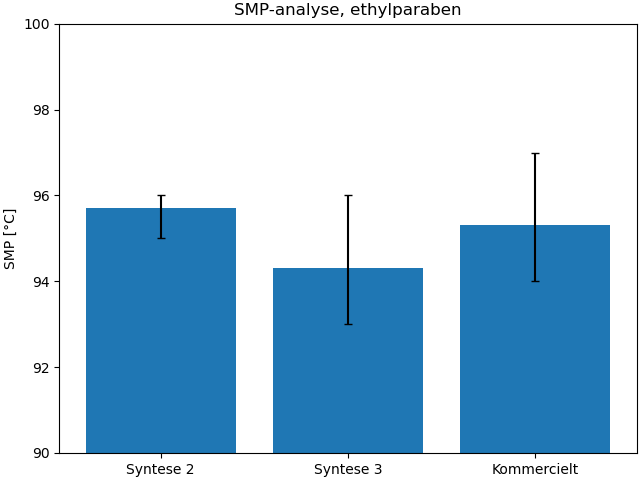

In [75]:
fig, ax = plt.subplots();

samples = ['Syntese 2', 'Syntese 3', 'Kommercielt'];
smp = [95.7, 94.3, 95.3];
smp_low = [.7, 1.3, 1.3];
smp_high = [.3, 1.7, 1.7];
smp_error = [smp_low, smp_high]

ax.set_ylim([90, 100])

ax.bar(samples, smp, yerr = smp_error, capsize=3);

ax.set_ylabel('SMP [°C]');
ax.set_title('SMP-analyse, ethylparaben');
plt.tight_layout(pad=0.25)
plt.savefig('propylsmp.pdf', dpi=150)

plt.show()